<a href="https://colab.research.google.com/github/suguna1993/MLPROJECTS/blob/main/penguins_dataset_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')


In [21]:
#LIST THE SEABORN DATASET
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [22]:
#IMPORT THE PENGUIN DATA SET
data = sns.load_dataset('penguins')
# Data dimensions
print(f' The data has {data.shape[0]} rows and {data.shape[1]} columns')




 The data has 344 rows and 7 columns


In [23]:
#Data sample
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [24]:
#check for null values
data.isnull().sum()  #number of missing values

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [25]:

round(data.isnull().mean()*100,2) #percentage of missing values in each columns

,0
species,0.00
island,0.00
bill_length_mm,0.58
bill_depth_mm,0.58
flipper_length_mm,0.58
body_mass_g,0.58
sex,3.20


In [26]:
#remove  the missing values
data.dropna(inplace=True)

In [27]:
# percetage missing values after removing it
round(data.isnull().mean()*100,2)

,0
species,0.0
island,0.0
bill_length_mm,0.0
bill_depth_mm,0.0
flipper_length_mm,0.0
body_mass_g,0.0
sex,0.0


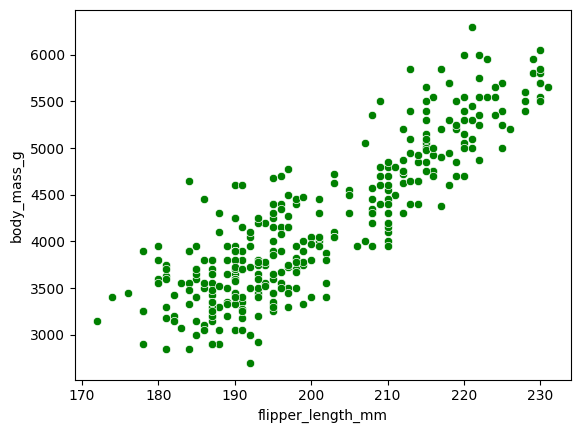

In [34]:
# what happens to body_mass when the flipper_length increases

sns.scatterplot(data=data,x = 'flipper_length_mm',y = 'body_mass_g',color='g')
plt.show()

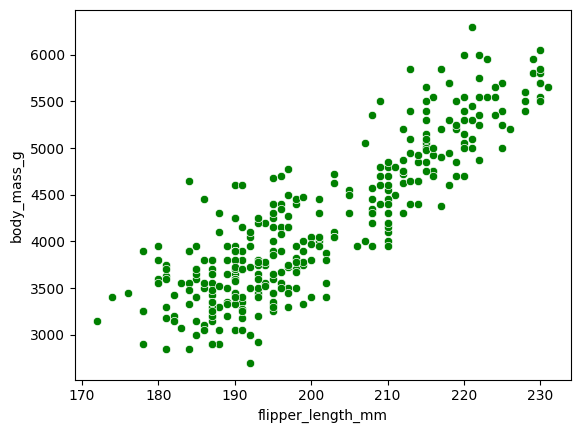

The correlation coefficient value is 0.87


In [37]:
#correlation coefficient value
#syntax
#var=data['x'].corr(data['y'])
sns.scatterplot(data=data,x = 'flipper_length_mm',y = 'body_mass_g',color='g')
plt.show()
s_corr=data['flipper_length_mm'].corr(data['body_mass_g'])
print("The correlation coefficient value is",round(s_corr,2))

In [40]:
#correlation coefficient for the entire dataframe
round(data.corr(numeric_only=True),2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.23,0.65,0.59
bill_depth_mm,-0.23,1.00,-0.58,-0.47
flipper_length_mm,0.65,-0.58,1.00,0.87
body_mass_g,0.59,-0.47,0.87,1.00


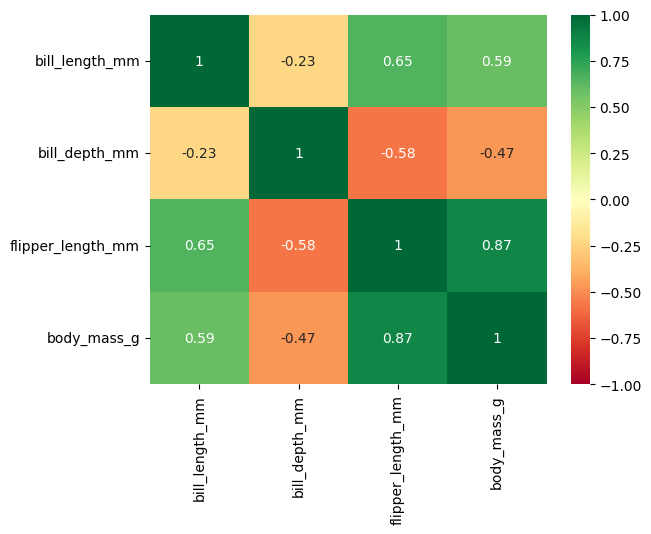

In [48]:
#heat map for seeing the correlation in visual way
sns.heatmap(data.corr(numeric_only='True'),annot=True,vmin=-1,vmax=1,cmap='RdYlGn' )  # # list of color maps from matplotlib
plt.show()

In [49]:
#from matplotlib import colormaps
#list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

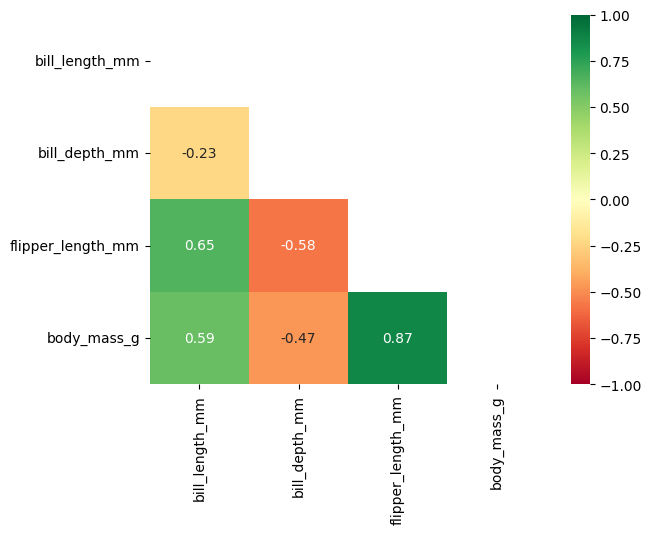

In [51]:
# Heatmap by masking the duplicates of correlation value

# masking
cor=data.corr(numeric_only=True)
upper=np.triu(cor)
sns.heatmap(data.corr(numeric_only='True'),
            annot=True,
            vmin=-1,vmax=1,
            cmap='RdYlGn',
            mask=upper )  # # list of color maps from matplotlib
plt.show()

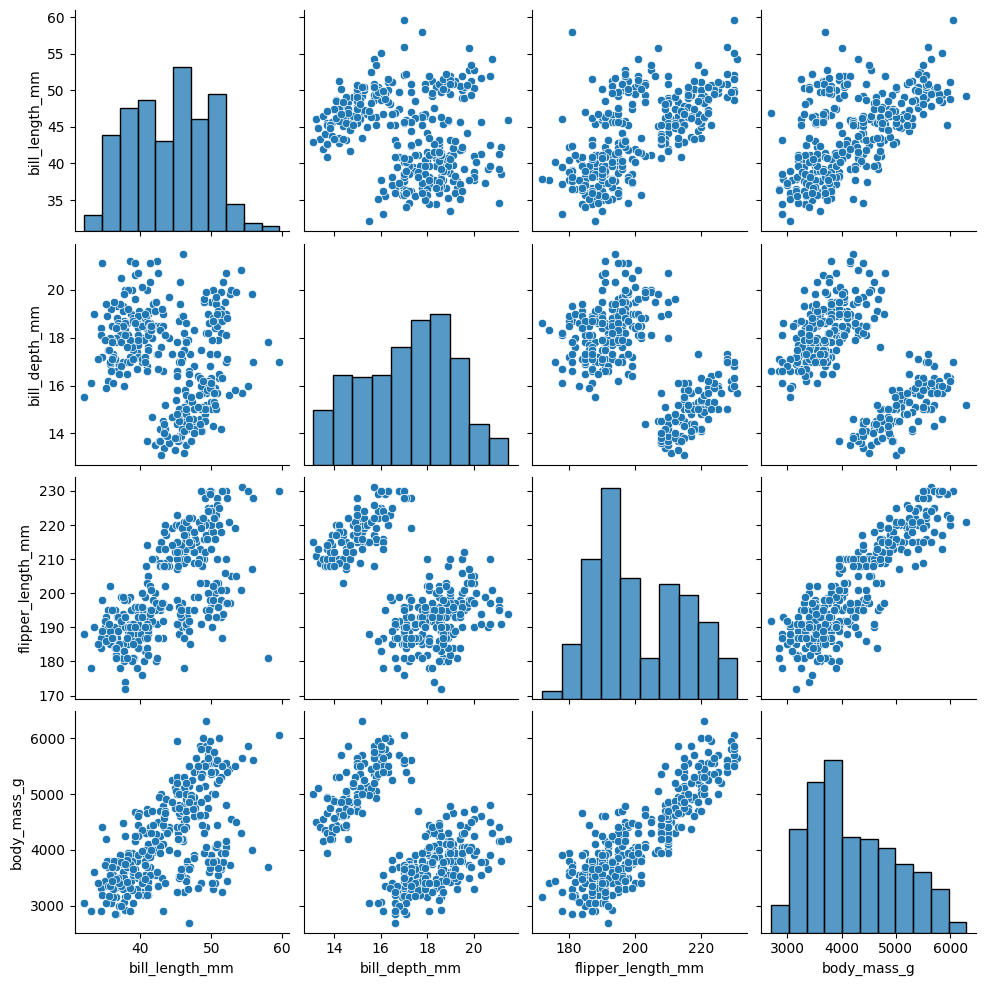

In [82]:
# What happens to body_mass when other numerical variable increase

# pairplot for easy answering
sns.pairplot(data)
plt.show()

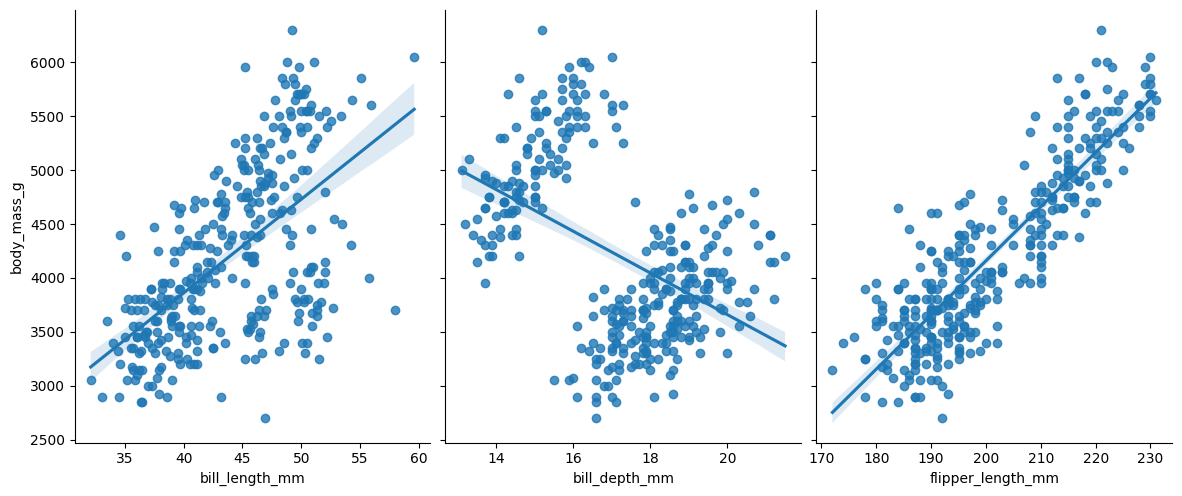

In [57]:
# What happens to body_mass when other numerical variable increase

# pairplot for easy answering
sns.pairplot(data,
             x_vars=['bill_length_mm','bill_depth_mm','flipper_length_mm'],
             y_vars=['body_mass_g'],height=5, aspect=0.8,kind='reg')
plt.show()

In [61]:
# unique list of categorical values
for cols in data.columns:
  if data[cols].dtype =='O':
    print(cols ,':',data[cols].unique())

species : ['Adelie' 'Chinstrap' 'Gentoo']
island : ['Torgersen' 'Biscoe' 'Dream']
sex : ['Male' 'Female']


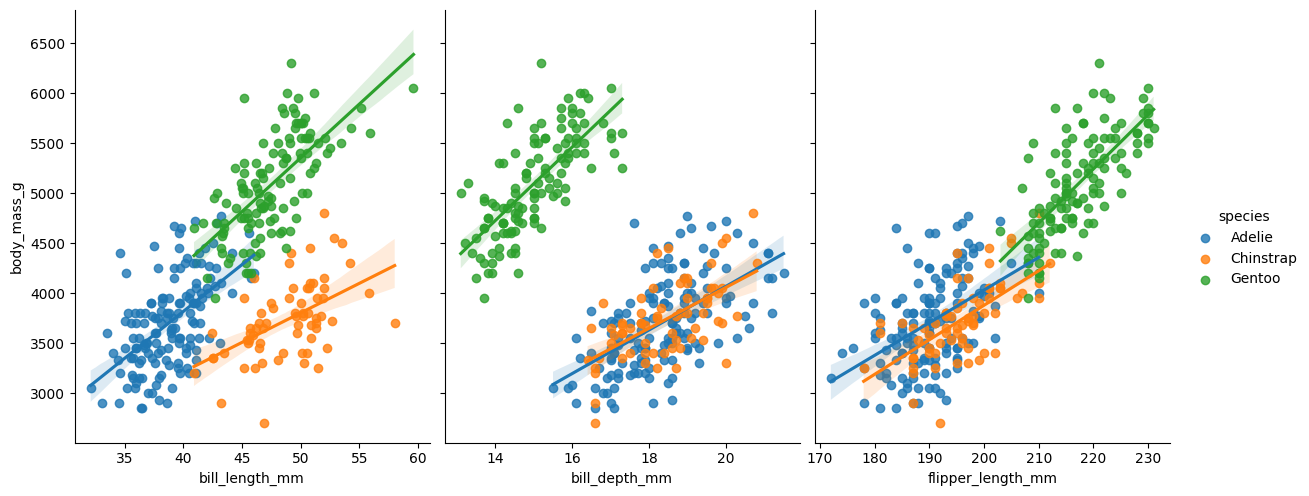

In [63]:
# What happens to body_mass when other numerical variable increase

# pairplot for easy answering
sns.pairplot(data,
             x_vars=['bill_length_mm','bill_depth_mm','flipper_length_mm'],
             y_vars=['body_mass_g'],
             hue='species',
             height=5, aspect=1,kind='reg')
plt.show()

In [74]:
# correlation of each indivdual species for bill_depth and body_mass
print("The overall correlation coefficient of bill_depth_mm and body_mass_gm is ",round(data['bill_depth_mm'].corr(data['body_mass_g']),2))

for species in data['species'].unique():
  species_df=data[data['species']==species]
  species_cor=species_df['bill_depth_mm'].corr(species_df['body_mass_g'])
  print(f'The correlation between bill_depth and body_mass for {species} species is',round(species_cor,2))



The overall correlation coefficient of bill_depth_mm and body_mass_gm is  -0.47
The correlation between bill_depth and body_mass for Adelie species is 0.58
The correlation between bill_depth and body_mass for Chinstrap species is 0.6
The correlation between bill_depth and body_mass for Gentoo species is 0.72


In [ ]:
# THE ABOVE BEHAVIOUR IS CALLED AS SIMPSON'S PARADOX

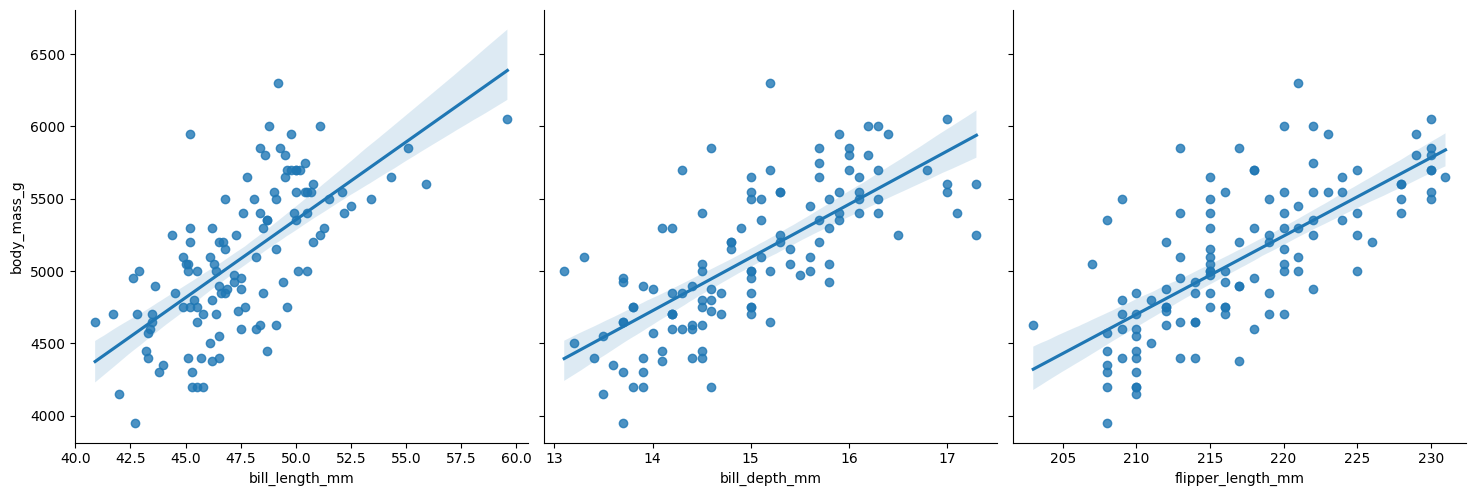

In [76]:
sns.pairplot(data=data[data['species']=='Gentoo'],x_vars=['bill_length_mm','bill_depth_mm','flipper_length_mm'],
             y_vars=['body_mass_g'],
                         height=5, aspect=1,kind='reg')
plt.show()

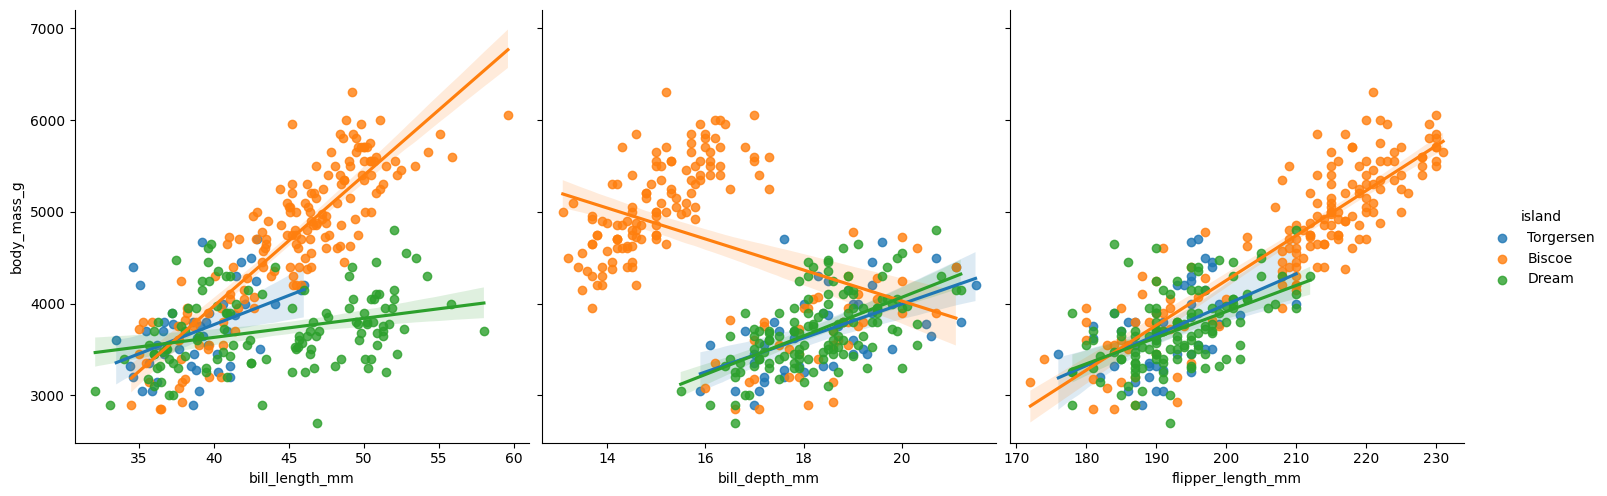

In [77]:
#home work
#1. body_mass_g against all other numerical features with island as hue
sns.pairplot(data=data,
             x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars=['body_mass_g'],
             hue='island',
             height=5, aspect=1, kind='reg')     # reg - regression
plt.show()

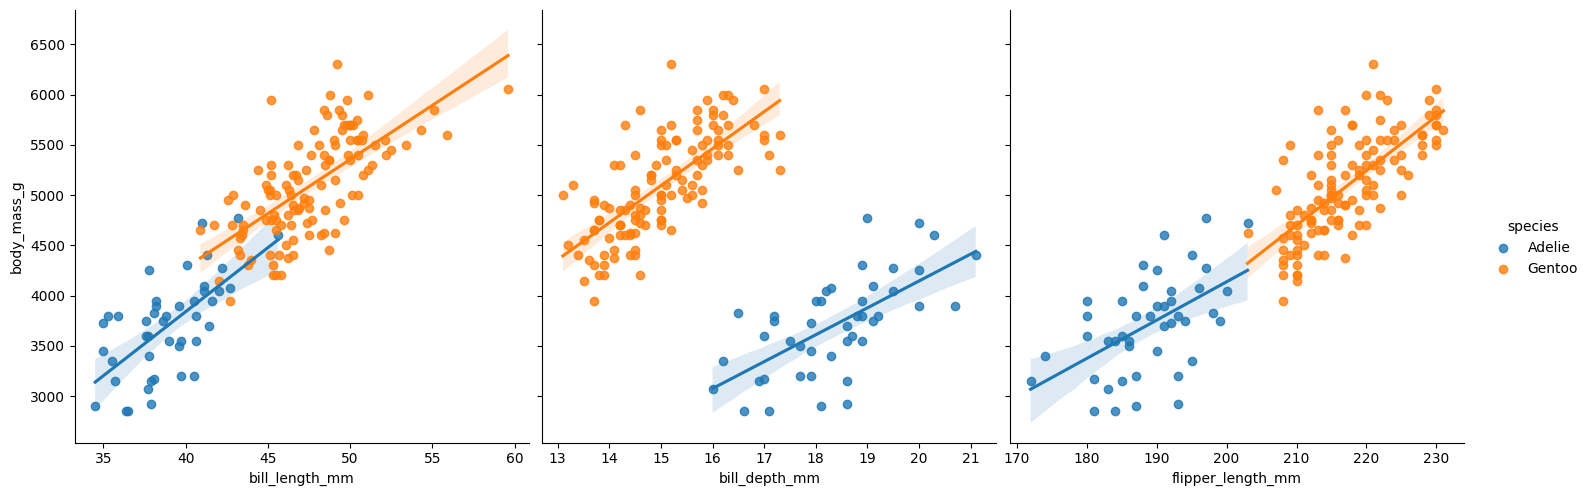

In [79]:
#2. body_mass_g against all other numerical features for species (hue) in Biscoe Island
sns.pairplot(data=data[data['island']== 'Biscoe'],
             x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars=['body_mass_g'],
             hue='species',
             height=5, aspect=1, kind='reg')     # reg - regression
plt.show()

In [80]:




data.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
#3. loops to identify the combination of island and species (island : [species])
